In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

Previously we entangled 2 qubits using CNOT by placing the control qubit in the |+> state using a Hadamard gate. What happens if we also put the second qubit in superposition?

In [8]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)
qc.cx(0,1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Latex object>

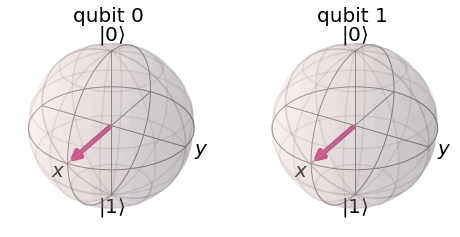

In [9]:
svsim = Aer.get_backend('aer_simulator')

qc.save_statevector()
qobj = assemble(qc)

final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state))

plot_bloch_multivector(final_state)

In [11]:
#do it again, except this time put the second qubit in the |-> state instead of |+>

qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.h(1)

qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Latex object>

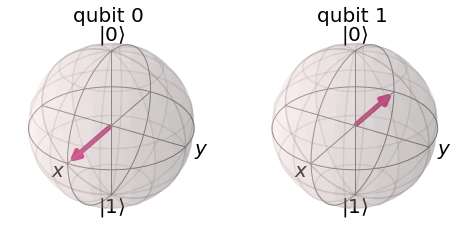

In [12]:
qc1 = qc.copy()
qc1.save_statevector()

final_state = svsim.run(qc1).result().get_statevector()

display(array_to_latex(final_state))
plot_bloch_multivector(final_state)

If we then add a CNOT to this state, we swap the amplitudes of |01> and |11> which is interesting because it affects the state of the *control* qubit and leaves the *target* qubit unchanged:

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

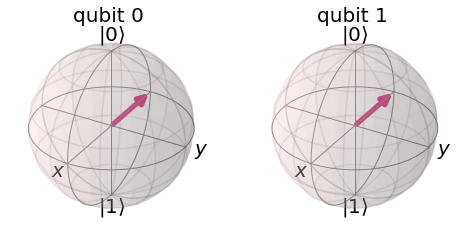

In [13]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)

final_state = svsim.run(qobj).result().get_statevector()

display(array_to_latex(final_state))
plot_bloch_multivector(final_state)

Wrapping a CNOT in H-gates is equivalent to switching the action on the control and target qubits; that is, the CNOT acts in the opposite direction

In [15]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw())

usim = Aer.get_backend('aer_simulator')

qc.save_unitary()
qobj = assemble(qc)

unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix='\\text{Circuit = }')

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

In [19]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

qc.save_unitary()
qobj = assemble(qc)

unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary,prefix='\\text{Circuit = }')

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

<IPython.core.display.Latex object>

#### Phase Kickback
The above is an example of **phase kickback**, where the eigenvalue added by a gate to a qubit is *kicked back* into a different qubit via a controlled operation.

For example, performing an X-gate on a |-> qubit produces a phase of -1:

X|-> = -|->

When the control qubit is |0> or |1> the phase affects the whole state, but this is a global phase with no observable effects. But when the control qubit is in a superposition, the component of the control qubit that lies in the direction of |1> applies this phase factor to the target qubit. This in turn kicks back a relative phase to the control qubit

Wrapping the CNOT in Hadamard gates will transform the qubits from the computational basis to the (|+>,|->) basis. This identity is useful in hardware, since some hardwares only allow for CNOTs in one direction between specific qubits

In [24]:
#controlled T-gate

qc = QuantumCircuit(2)
qc.cp(pi/4, 0,1)
display(qc.draw())

qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

array_to_latex(unitary,prefix='\\text{Controlled-T circuit = }')

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

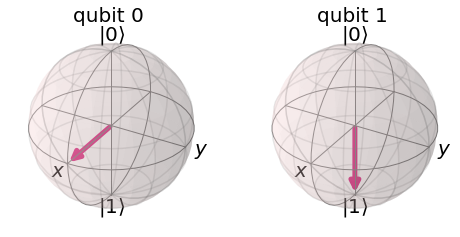

In [27]:
#circuit without controlled-T

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)

final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

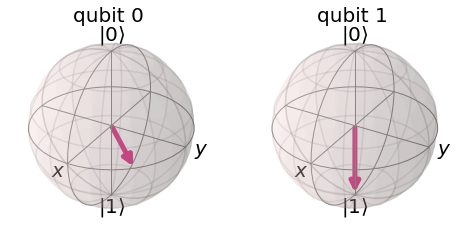

In [28]:
#circuit with controlled-T

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4,0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)

final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

Note the control qubit is rotated, due to the controlled-T gate acting on a control qubit in superposition